# Phương pháp Runge Kutta giải phương trình vi phân

Bài toán:
$$\begin{cases} y'(x) &=& f(x,y) \\ y(x_0) &=& y_0 \end{cases}$$

Xét khai triển Taylor:
$$y(x) = y(x_0) + y'(x_0)(x-x_0) + \frac{y''(x_0)}{2!}(x-x_0)^2 + ... + \frac{y^{(k)}(x_0)}{k!}(x-x_0)^k + O(x-x_0)^{k+1}$$
Ta có thể dựa vào khai triển Taylor trên để tìm được nghiệm của PTVP. Tuy nhiên việc tính đạo hàm khá phức tạp nên Runge và Kutta đã tạo phát triển một phương pháp (RK) để có thể giải quyết vấn đề trên.

Ta sẽ chỉ xét RK hiện trong bài này.

Công thức RK tổng quát:
$$\begin{cases} y_{n+1}&=&y_n+r_1k_1+r_2k_2+...+r_sk_s \\ k_i&=&hf(x_n+\alpha_i h, y(x_n+\alpha_i h)) \end{cases}$$

Ta đi xác định $y(x_n+\alpha_i h)$ dựa vào khai triển Taylor và truy hổi trong đó, $0 < \alpha_i < 1$.

Sau cùng ta được công thức RK tổng quát:
$$\begin{cases} y_{n+1}&=&y_n+r_1k_1+r_2k_2+...+r_sk_s \\ k_i&=&hf(x_n+\alpha_i h, y_n+\beta_{i1}k_1+...+\beta_{ii-1}k_{i-1})) \end{cases}$$
Với $\alpha_1 = 0, \alpha_i \in (0,1)$

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Input

In [2]:
def function(x, y):
    return x + y

x0 = 0
y0 = 1
N = 100
X = 5

## Trường hợp 1 nấc (Euler hiện)

Ta sẽ có:
$$\begin{cases} s &=& 1 \\ y_{n+1} &=& y_n+r_1k_1 \\ k_1&=&hf(x_n,y_n)  \end{cases}$$

Trong đó, $$y(x_{n+1}) = y(x_n)+hy'(x_n)+O(h^2)  $$

Vậy công thức RK1 đồng nhất với Euler hiện:
$$y(x_{n+1}) = y(x_n)+hf(x_n,y_n)$$

In [3]:
def RK1(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        y0 += h*function(x0, y0)
        x0 += h
        res.append(y0)
    return res

## Trường hợp 2 nấc

Ta có:
$$\begin{cases} s &=& 2 \\ y_{n+1} &=& y_n+r_1k_1+r_2k_2 \\ k_1&=&hf(x_n,y_n) \\ k_2 &=& hf(x_n+\alpha_2 h, y_n+\beta_{21}k_1) \end{cases}$$

Nhận thấy $$\begin{array}{lcl} k_2 &=& hf(x_n+\alpha_2 h, y_n+\beta_{21}k_1) \\
    &=& h[f_n+f_{x,n}.(\alpha_2 h)+f_{y,n}.(\beta_{21}k_1)+O(h^2)]
\end{array}$$

Từ đó, ta có:
$$\begin{cases}
y_{n+1} &=& y_n+r_1hf_n+r_2h[f_n+f_{x,n}.(\alpha_2 h)+f_{y,n}.(\beta_{21}k_1)+O(h^2)]\\
y(x_{n+1}) &=& y(x_n)+hf_n+\frac{h^2}{2}[f_{x,n}+f_{y,n}.f_n] + O(h^3)
\end{cases}$$

Sử dụng đồng nhất thức, ta có:
$$\begin{cases}
r_1+r_2&=&1 \\
r_2\alpha_2&=&\frac{1}{2} \\
r_2\beta_{21}&=&\frac{1}{2}
\end{cases}$$

Như vậy với mỗi $\alpha_2$ ta sẽ có được công thức RK 2 tương ứng

#### Xét trường hợp $\alpha_2 = \frac{1}{2}:$
Ta có công thức RK2:
$$\begin{cases}
y_{n+1}&=&y_n+k_2 \\
k_1&=&hf_n \\
k_2&=&hf(x_n+\frac{h}{2},y_n+\frac{k_1}{2})
\end{cases}$$

In [4]:
def RK2_half(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        y0 += h*function(x0 + h/2, y0 + h*function(x0, y0)/2)
        x0 += h
        res.append(y0)
    return res

#### Xét trường hợp $\alpha_2 = 1$ (Công thức Euler cải tiến):
Ta có công thức RK2:
$$\begin{cases}
y_{n+1}&=&y_n+\frac{1}{2}k_1+\frac{1}{2}k_2 \\
k_1&=&hf_n \\
k_2&=&hf(x_n+h,y_n+k_1)
\end{cases}$$

In [5]:
def RK2_one(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        y0 += h/2 * (function(x0, y0) + function(x0 + h, y0 + h*function(x0, y0)))
        x0 += h
        res.append(y0)
    return res

## Trường hợp 3 nấc

Ta có:
$$\begin{cases} s &=& 3 \\ 
y_{n+1} &=& y_n+r_1k_1+r_2k_2+r_3k_3 \\
k_1 &=& hf(x_n,y_n) \\
k_2 &=& hf(x_n+\alpha_2 h, y_n+\beta_{21}k_1) \\
k_3 &=& hf(x_n+\alpha_3 h, y_n+\beta_{31}k_1\beta_{32}k_2)
\end{cases}$$

Nhắc lại khai triển Taylor cho hàm nhiều biến:
$$f(x,y) = f_n
        +\begin{pmatrix}f'_x + f'_y\end{pmatrix}\begin{pmatrix}\Delta x \\ \Delta y\end{pmatrix}
        +\frac{1}{2!}\begin{pmatrix}\Delta x \\ \Delta y\end{pmatrix}\begin{pmatrix}f''_{xx}&f''_{xy} \\ f''_{xy}&f''_{yy} \end{pmatrix}\begin{pmatrix}\Delta x \\ \Delta y\end{pmatrix}
        +...
$$

Do đó,
$$\begin{array}{lcl}
k_1 &=& hf_n \\
k_2 &=& h\Big[f_n+\alpha_2 hf'_{x,n}+\beta_{21}k_1f'_{y,n}+\frac{1}{2}(\alpha_2 h)^2f''_{xx,n}+(\alpha_2 h)(\beta_{21}k_1)f''_{xy,n}+\frac{1}{2}(\beta_{21}k_1)^2f''_{yy,n}+O(h^3)\Big] \\
k_3 &=& h\Big[f_n+\alpha_3 hf'_{x,n}+(\beta_{31}k_1+\beta_{32}k_2)f'_{y,n}+\frac{1}{2}(\alpha_3 h)^2f''_{xx,n}+(\alpha_3 h)(\beta_{31}k_1+\beta_{32}k_2)f''_{xy,n}+\frac{1}{2}(\beta_{31}k_1+\beta_{32}k_2)^2f''_{yy,n}+O(h^3) \Big]
\end{array}$$

Mặt khác theo khai triển Taylor,
$$y_{n+1}=y_n+\frac{1}{2}(f'_{x,n}+f'_{y,n}f_n)h^2+\frac{1}{3!}(f''_{xx,n}+f''_{xy,n}+(f''_{yx,n}+f''_{yy,n})f_n+f'_{y,n}(f'_{x,n}+f'_{y,n}f_n))h^3 +O(h^4) $$

Sử dụng đồng nhất hệ số, ta được hệ phương trình sau:
$$\begin{cases}
r_1+r_2+r_3&=&1 \\
r_2\alpha_2+r_3\alpha_3&=&\frac{1}{2} \\
r_2\beta_{21}+r_3(\beta_{31}+\beta_{32})&=&\frac{1}{2} \\
\frac{1}{2}r_2\alpha_2^2+\frac{1}{2}r_3\alpha_3^2&=&\frac{1}{6} \\
r_2\alpha_2\beta_{21}+r_3\alpha_3(\beta_{31}+\beta_{32})&=&\frac{1}{6} \\
\frac{1}{2}r_2\beta_{21}^2+\frac{1}{2}r_3(\beta_{31}^2+\beta_{32}^2)&=&\frac{1}{6} \\
r_3\beta_{32}\beta_{21}&=&\frac{1}{6}
\end{cases}$$

#### Một số bộ RK3 thường dùng

Bộ thứ nhất: 
$\\ r_1=\frac{1}{6};r_2=\frac{2}{3};r_3=\frac{1}{2};\alpha_2=\frac{1}{2};\alpha_3=1;\beta_{21}=\frac{1}{2};\beta_{31}=-1;\beta_{32}=2$
$$\begin{cases}
y_{n+1}&=&y_n+\frac{1}{6}(k_1+4k_2+k_3) \\
k_1 &=& hf_n \\
k_2 &=& hf(x_n+\frac{1}{2}h, y_n+\frac{1}{2}k_1) \\
k_3 &=& hf(x_n+h, y_n-k_1+2k_2)
\end{cases}$$

In [6]:
def RK3(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        k1 = h*function(x0, y0)
        k2 = h*function(x0 + (1/2)*h, y0 + (1/2)*k1)
        k3 = h*function(x0 + h, y0 - k1 + 2*k2)
        y0 += 1/6 * (k1 + 4*k2 + k3)
        x0 += h
        res.append(y0)
    return res

Bộ thứ hai (Heun):
$\\ r_1=\frac{1}{4};r_2=0;r_3=\frac{3}{4};\alpha_2=\frac{1}{3};\alpha_3=\frac{2}{3};\beta_{21}=\frac{1}{3};\beta_{31}=0;\beta_{32}=\frac{2}{3}$
$$\begin{cases}
y_{n+1}&=&y_n+\frac{1}{4}(k_1+3k_3) \\
k_1 &=& hf_n \\
k_2 &=& hf(x_n+\frac{1}{3}h, y_n+\frac{1}{3}k_1) \\
k_3 &=& hf(x_n+\frac{2}{3}h, y_n+\frac{2}{3}k_2)
\end{cases}$$

In [7]:
def RK3_Heun(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        k1 = h*function(x0, y0)
        k2 = h*function(x0 + (1/3)*h, y0 + (1/3)*k1)
        k3 = h*function(x0 + (2/3)*h, y0 + (2/3)*k2)
        y0 += 1/4 * (k1 + 3*k3)
        x0 += h
        res.append(y0)
    return res

## Trường hợp 4 nấc (thường dùng)

$$\begin{cases}
y_{n+1}&=&y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4) \\
k_1 &=& hf_n \\
k_2 &=& hf(x_n+\frac{1}{2}h, y_n+\frac{1}{2}k_1) \\
k_3 &=& hf(x_n+\frac{1}{2}h, y_n+\frac{1}{2}k_2) \\
k_4 &=& hf(x_n+h, y_n+k_3)
\end{cases}$$

In [8]:
def RK4(x0, X, y0, N):
    res = []
    h = (X-x0) / (N-1)
    res.append(y0)
    for i in range(1, N):
        k1 = h*function(x0, y0)
        k2 = h*function(x0 + (1/2)*h, y0 + (1/2)*k1)
        k3 = h*function(x0 + (1/2)*h, y0 + (1/2)*k2)
        k4 = h*function(x0 + h, y0 + k3)
        y0 += 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        x0 += h
        res.append(y0)
    return res

## Kết quả chạy chương trình

<function RK1 at 0x0000028574072820>


C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_8352/3278426162.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y_Real, '-ok', color='green', label = 'Real')


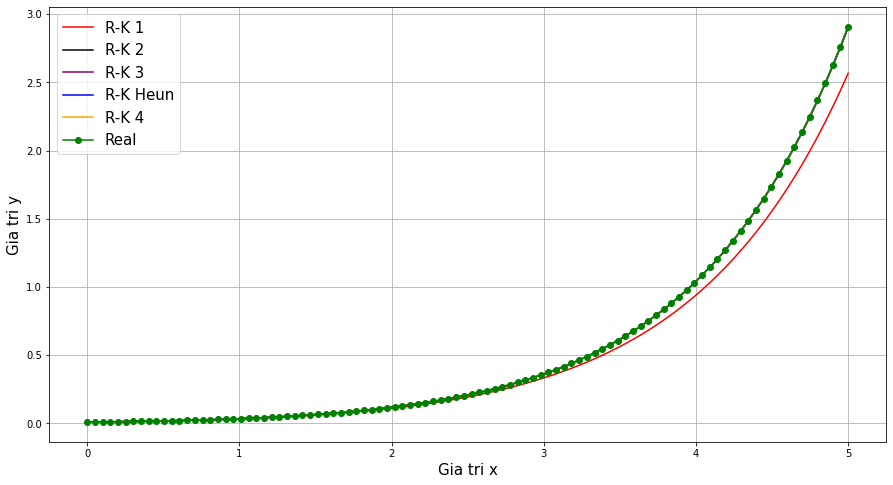

In [15]:
res_RK1 = RK1(x0, X, y0, N)
# res_RK2_half = RK2_half(x0, X, y0, N)
res_RK2_one = RK2_one(x0, X, y0, N)
res_RK3 = RK3(x0, X, y0, N)
res_RK3_Heun =  RK3_Heun(x0, X, y0, N)
res_RK4 = RK4(x0, X, y0, N)

scale = 10**(-2)

for i in range(0, N):
    res_RK1[i] *= scale
    # res_RK2_half[i] *= scale
    res_RK2_one[i] *= scale
    res_RK3[i] *= scale
    res_RK3_Heun[i] *= scale
    res_RK4[i] *= scale

print(RK1)

x = np.linspace(x0, X, N)

plt.plot(x, res_RK1, 'red', label='R-K 1')
plt.plot(x, res_RK2_one, 'black', label='R-K 2')
plt.plot(x, res_RK3, 'purple', label='R-K 3')
plt.plot(x, res_RK3_Heun, 'blue', label='R-K Heun')
plt.plot(x, res_RK4, 'orange', label='R-K 4')

y_Real = []

for i in x:
    y_Real.append((2*math.exp(i) - i - 1)*scale)

plt.plot(x, y_Real, '-ok', color='green', label = 'Real')

plt.legend(fontsize=15)
plt.xlabel('Gia tri x', size=15)
plt.ylabel('Gia tri y', size=15)

plt.grid()
fig = plt.gcf()

fig.set_size_inches(15, 8, forward=False)

plt.show()